<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据集说明" data-toc-modified-id="数据集说明-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据集说明</a></span></li><li><span><a href="#数据探索" data-toc-modified-id="数据探索-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据探索</a></span><ul class="toc-item"><li><span><a href="#数据准备" data-toc-modified-id="数据准备-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>数据准备</a></span></li><li><span><a href="#数据概况" data-toc-modified-id="数据概况-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>数据概况</a></span></li><li><span><a href="#数据分布" data-toc-modified-id="数据分布-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>数据分布</a></span><ul class="toc-item"><li><span><a href="#7大行为分布" data-toc-modified-id="7大行为分布-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>7大行为分布</a></span></li><li><span><a href="#用户与feed交互行为分布" data-toc-modified-id="用户与feed交互行为分布-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>用户与feed交互行为分布</a></span></li><li><span><a href="#feed属性分布" data-toc-modified-id="feed属性分布-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>feed属性分布</a></span></li></ul></li><li><span><a href="#样本定义" data-toc-modified-id="样本定义-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>样本定义</a></span></li></ul></li></ul></div>

## 数据集说明

https://algo.weixin.qq.com/problem-description

## 数据探索

### 数据准备

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, Markdown
mprint = lambda x: display(Markdown(x))

In [2]:
user_action = pd.read_csv('user_action.csv')
feed_info = pd.read_csv('feed_info.csv')
feed_embeddings = pd.read_csv('feed_embeddings.csv')

样本表以user_action为基础构建。

### 数据概况

In [4]:
mprint('user_action数据共%s行。' %  len(user_action))
mprint('feed_info数据共%s行。' %  len(feed_info))
mprint('feed_embeddings数据共%s行。' %  len(feed_embeddings))

user_action数据共7317882行。

feed_info数据共106444行。

feed_embeddings数据共106444行。

In [5]:
user_action.head(10)

,userid,feedid,date_,device,read_comment,comment,like,play,stay,click_avatar,forward,follow,favorite
0,8,71474,1,1,0,0,1,500,5366,0,0,0,0
1,8,73916,1,1,0,0,0,250,1533,0,0,0,0
2,8,50282,1,1,0,0,0,750,1302,0,0,0,0
3,8,11391,1,1,0,0,1,3750,5191,0,0,0,0
4,8,27349,1,1,0,0,0,250,800,0,0,0,0
5,8,30287,1,1,0,0,0,0,1496,0,0,0,0
6,8,1151,1,1,0,0,0,250,976,0,0,0,0
7,8,69745,1,1,0,0,0,250,817,0,0,0,0
8,8,22451,1,1,0,0,0,0,2014,0,0,0,0
9,8,97911,1,1,0,0,0,250,861,0,0,0,0


In [6]:
feed_info.head(10)

,feedid,authorid,videoplayseconds,description,ocr,asr,bgm_song_id,bgm_singer_id,manual_keyword_list,machine_keyword_list,manual_tag_list,machine_tag_list,description_char,ocr_char,asr_char
0,43549,6165,38,104741 122649 8109 117252 65632 23463 118668 4...,139499 59421 82007 142955 27736 83577 52394 11...,142955 27736 83577 103956 32010 34170 89740 90...,19356.0,11703.0,15506;7715;17582,26334;219;25209;7715;18541,81;269;159;6,269 0.8525666;81 0.8525666;8 1.1e-07;306 0.0;2...,26439 5247 6426 3827 1882 26018 20744 22204 30...,25926 8491 13394 2203 26439 6243 33054 16435 1...,2203 26439 6243 33054 16435 16307 17070 24908 ...
1,77432,9386,60,35753 27736 146603 73055 11794 101761 11794 81...,35753 146603 73055 11794 101761 67496 16933 52...,146739 14368 79290 79213 47366 8109 33194 1198...,NaN,NaN,8199;18322;4243,24078;19924,194;267;159;6,267 0.99293476;194 0.99293476,31010 32495 6243 13923 15360 30483 2709 26084 ...,31010 32495 13923 15360 30483 2709 26084 15160...,7259 20851 5061 26207 17573 17531 15117 20072 ...
2,12921,2996,15,114413 107973 117252 27736 41035 32715 125374 ...,NaN,NaN,10288.0,11354.0,NaN,11696;6926,202;23;160;6,23 0.64771646;202 0.64771646,27077 10050 27464 20072 26018 6243 21492 14750...,NaN,NaN
3,34538,12577,18,60473 9864 8109 135558 108803 89307 37630 6481...,39654 95201 22675 49521 135558 108803 89307 37...,7446 47082 37630 99660 9844 113002 9844 113002...,24435.0,13645.0,5454;1197;3727,NaN,328;13;159;6,267 0.21298289;191 0.21298289;8 0.34298885;306...,21489 24672 2223 1882 4956 1545 10424 19791 12...,9015 21209 5026 11192 4956 1545 10424 19791 12...,20825 13395 14765 24513 7305 12837 10337 8885 ...
4,75414,7185,16,105860 4691 134820 55911 80449 79213 23233 139...,73055 66447 88970,104002 4438 104002 4438,23428.0,10730.0,17083;4123,8058;219;21639;15621;25209,81;269;159;6,269 0.86163938;81 0.86163938,25782 19583 7768 3907 14068 12681 5043 17859 1...,30483 23721 1518 22741 25118,23112 969 23112 969
5,34539,2595,43,123046 116187 8092 22091 77895 11717 93522 100...,61498 70163 1428 123046 116187 44971 3063 3214...,147566 45843 10952 25290 79030 11717 34198 993...,16541.0,17296.0,529;2666;26954,529;9298,45;239;159;169,239 0.68520623;45 0.68520623;8 0.0;306 0.0;207...,27442 1543 31605 1868 20857 22179 17181 7261 8...,13842 6439 32379 25274 8847 1251 27442 1543 31...,15371 6498 31376 30024 24307 21492 10083 20072...
6,101310,8115,15,106872 36623 26564 8109 110838 148383 26564 33...,9837 110838 148383 26564 33895 110690 133005,117252 44854 26564 110142 93536 91254 8109 983...,19367.0,10532.0,NaN,18351;13433;25057;11002;14687;10664;19485;12865,9;6,237 0.90296459;246 0.90296459,20831 11704 11598 11354 5967 1882 1217 23805 1...,2200 1217 23805 10083 14040 5967 12194 13395 1...,26018 10155 5967 24513 20833 5311 32214 1882 2...
7,13769,11696,25,144240 54435 37630 117252 27736 40670 134820 1...,63733 106137 31785 73044 25794 65020 90843 107...,123075 11342 79301 23908 110100 112151 110677 ...,NaN,NaN,NaN,8800;11061;15752,9;6,17 0.74826479;37 0.74826479,12783 22473 5277 10040 12837 26018 6243 8311 3...,20857 15640 7261 23039 30060 32499 5009 8481 7...,30191 2606 17583 5391 20861 15640 12836 4895 1...
8,6311,9533,60,102036 39661 66989 110142 118715 93522 24335 8...,122344 140404 55785 26564 93563 102383 27736 7...,90843 31279 117347 116237 8109 287 49575 56976...,NaN,NaN,NaN,17892;18428,9;6,235 0.36773422;204 0.36773422,2682 32028 12649 7461 4913 29499 24513 24368 2...,12676 3901 31177 12653 5967 20857 3653 11877 6...,26018 2223 30031 2220 26054 18659 15360 1882 6...
9,6801,13501,14,45012 25146 45443 122452 875 80983 8109 25146 ...,20248 33368 37767 37767 82007 78435 69591 9354...,90290 77895 25146 106949 129539 106793 304 277...,NaN,NaN,15506;17582;10844,25209;219;4826;25500,81;269;159;6,269 0.96752864;81 0.96752864,10226 13505 15360 10326 17526 26208 253 12762 ...,27393 7536 7349 7349 17323 11893 20838 18755 3...,20085 17181 13505 15360 23786 14009 12831 2706...


In [7]:
feed_embeddings.head(10)

,feedid,feed_embedding
0,46022,-0.02032269 0.06095614 0.11057708 0.03385210 0...
1,73903,-0.07594238 0.01796364 -0.00135112 -0.00333468...
2,88646,-0.05067272 -0.08208735 -0.01929738 -0.0150182...
3,24381,-0.06976026 0.00218324 0.04416835 0.06146711 -...
4,41542,-0.04981736 -0.03523079 0.03022859 0.06672543 ...
5,15622,-0.10077595 -0.01764622 0.03897166 -0.04593844...
6,5662,-0.07481042 -0.07795808 0.00200225 -0.02691050...
7,4282,-0.00903127 0.04316609 0.06915708 0.00960549 0...
8,26337,-0.04625623 -0.01046129 0.08407867 -0.00102488...
9,64025,-0.03590044 0.01959696 0.01913530 0.03326439 0...


### 数据分布

#### 7大行为分布

In [8]:
user_action_stat1 = user_action.groupby('date_').agg(
    samples_n=pd.NamedAgg(column="userid", aggfunc='count'), # 样本数
    UV=pd.NamedAgg(column="userid", aggfunc='nunique'), # 独立客户数
    feed_unique_n=pd.NamedAgg(column="feedid", aggfunc='nunique'), # 被展示的feed数
    read_comment_n=pd.NamedAgg(column="read_comment", aggfunc='sum'), # 查看评论数
    like_n=pd.NamedAgg(column="like", aggfunc='sum'), # 点赞数
    click_avatar_n=pd.NamedAgg(column="click_avatar", aggfunc='sum'), # 点击头像数
    favorite_n=pd.NamedAgg(column="favorite", aggfunc='sum'), # 收藏数
    forward_n=pd.NamedAgg(column="forward", aggfunc='sum'), # 转发数
    comment_n=pd.NamedAgg(column="comment", aggfunc='sum'), # 评论数
    follow_n=pd.NamedAgg(column="follow", aggfunc='sum'), # 关注数
)
user_action_stat1

,samples_n,UV,feed_unique_n,read_comment_n,like_n,click_avatar_n,favorite_n,forward_n,comment_n,follow_n
date_,,,,,,,,,,
1,478489,11123,24035,15857,12377,3477,551,1930,200,375
2,461842,11281,26304,15951,12177,3500,522,2024,190,372
3,543566,11875,27715,20275,14951,3967,788,1979,211,369
4,504623,11700,28332,18583,13697,4113,717,1969,214,394
5,444828,11427,28973,13588,11460,3455,517,2037,175,331
6,472726,11858,31531,16095,12568,3461,699,1995,216,351
7,480460,11967,31871,16031,12766,3514,561,1947,155,355
8,500120,12170,33073,16970,13041,3470,726,1937,179,286
9,512466,12350,35176,18289,13305,4046,958,1955,247,371


In [12]:
# 7大行为比率
user_action_stat1['read_comment_rate'] = user_action_stat1['read_comment_n'] / user_action_stat1['samples_n']
user_action_stat1['like_rate'] = user_action_stat1['like_n'] / user_action_stat1['samples_n']
user_action_stat1['click_avatar_rate'] = user_action_stat1['click_avatar_n'] / user_action_stat1['samples_n']
user_action_stat1['favorite_rate'] = user_action_stat1['favorite_n'] / user_action_stat1['samples_n']
user_action_stat1['forward_rate'] = user_action_stat1['forward_n'] / user_action_stat1['samples_n']
user_action_stat1['comment_rate'] = user_action_stat1['comment_n'] / user_action_stat1['samples_n']
user_action_stat1['follow_rate'] = user_action_stat1['follow_n'] / user_action_stat1['samples_n']

user_action_stat1[['read_comment_rate','like_rate','click_avatar_rate','favorite_rate','forward_rate','comment_rate','follow_rate']]

,read_comment_rate,like_rate,click_avatar_rate,favorite_rate,forward_rate,comment_rate,follow_rate
date_,,,,,,,
1,0.033140,0.025867,0.007267,0.001152,0.004034,0.000418,0.000784
2,0.034538,0.026366,0.007578,0.001130,0.004382,0.000411,0.000805
3,0.037300,0.027505,0.007298,0.001450,0.003641,0.000388,0.000679
4,0.036826,0.027143,0.008151,0.001421,0.003902,0.000424,0.000781
5,0.030547,0.025763,0.007767,0.001162,0.004579,0.000393,0.000744
6,0.034047,0.026586,0.007321,0.001479,0.004220,0.000457,0.000743
7,0.033366,0.026570,0.007314,0.001168,0.004052,0.000323,0.000739
8,0.033932,0.026076,0.006938,0.001452,0.003873,0.000358,0.000572
9,0.035688,0.025963,0.007895,0.001869,0.003815,0.000482,0.000724


#### 用户与feed交互行为分布

In [13]:
user_action_base_stat2 = user_action.groupby(['userid','date_']).agg(
    user_feed_unique_n=pd.NamedAgg(column="feedid", aggfunc='nunique'), # 用户平均每天刷到的feed数量
    user_feed_play_avg=pd.NamedAgg(column="play", aggfunc='mean'), # 用户每天平均播放时长分布
    user_feed_stay_avg=pd.NamedAgg(column="stay", aggfunc='mean'), # 用户每天平均停留时长分布
)
user_action_base_stat2['user_feed_play_avg'] = user_action_base_stat2['user_feed_play_avg'].astype(np.int)
user_action_base_stat2['user_feed_stay_avg'] = user_action_base_stat2['user_feed_stay_avg'].astype(np.int)
user_action_base_stat2.reset_index(level=1, inplace=True)

user_action_base_stat2

,date_,user_feed_unique_n,user_feed_play_avg,user_feed_stay_avg
userid,,,,
8,1,21,1392,2608
8,2,44,1477,2496
8,3,27,1083,2533
8,5,12,2083,4177
8,6,25,1240,2568
...,...,...,...,...
250236,3,41,11793,21148
250236,4,17,9722,17078
250236,8,55,7160,13170


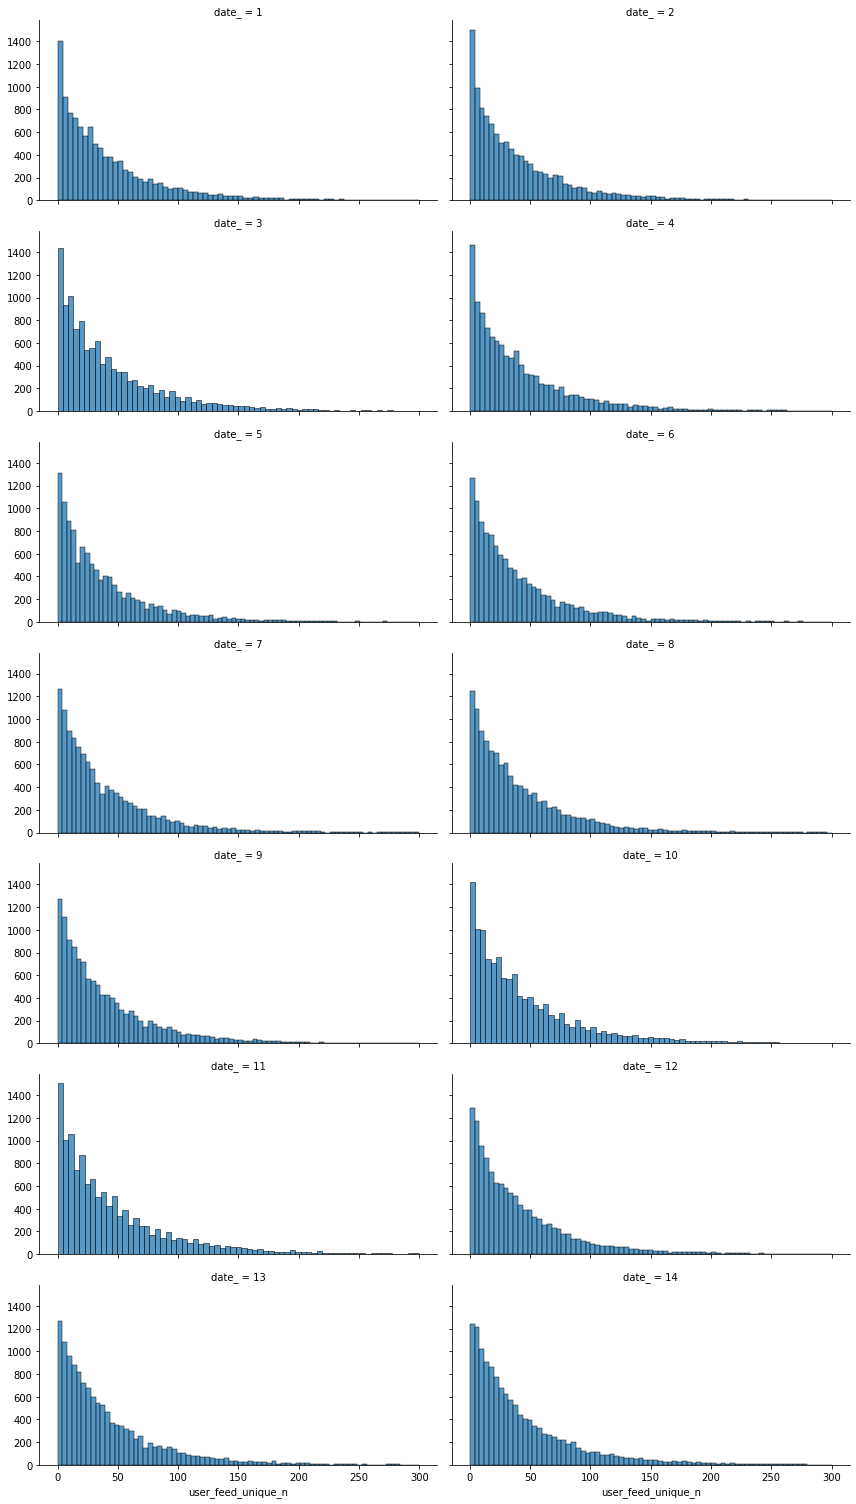

In [14]:
# 用户平均每天刷到的feed数量 直方图
g = sns.FacetGrid(user_action_base_stat2, col='date_', col_wrap=2, height=3, aspect=2)
g.map(sns.histplot, 'user_feed_unique_n', binrange=[0,300])

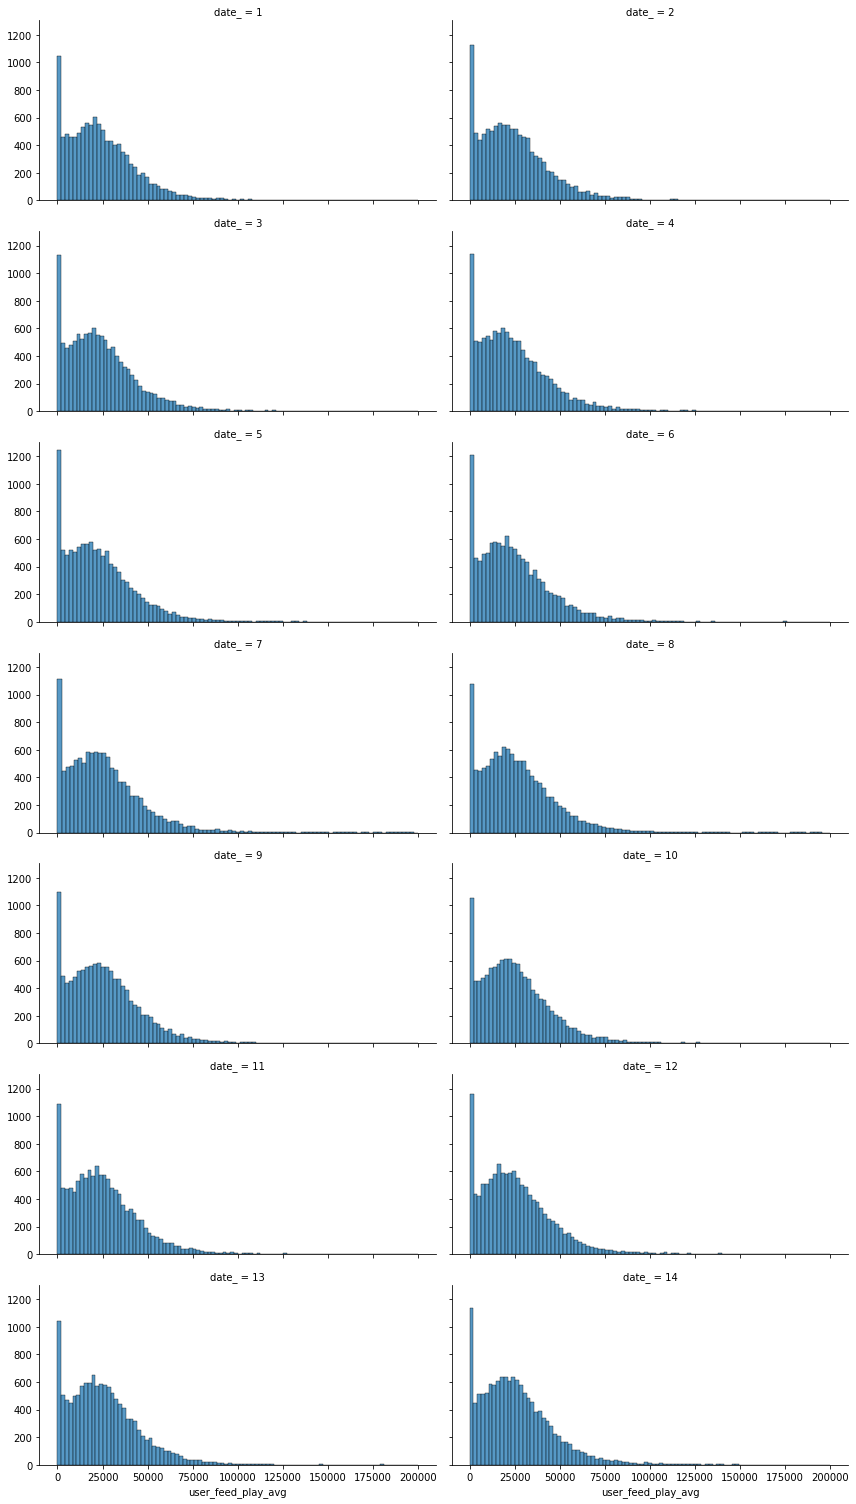

In [15]:
# 用户每天平均播放时长分布 直方图
g = sns.FacetGrid(user_action_base_stat2, col='date_', col_wrap=2, height=3, aspect=2)
g.map(sns.histplot, 'user_feed_play_avg', binrange=[0,200000])

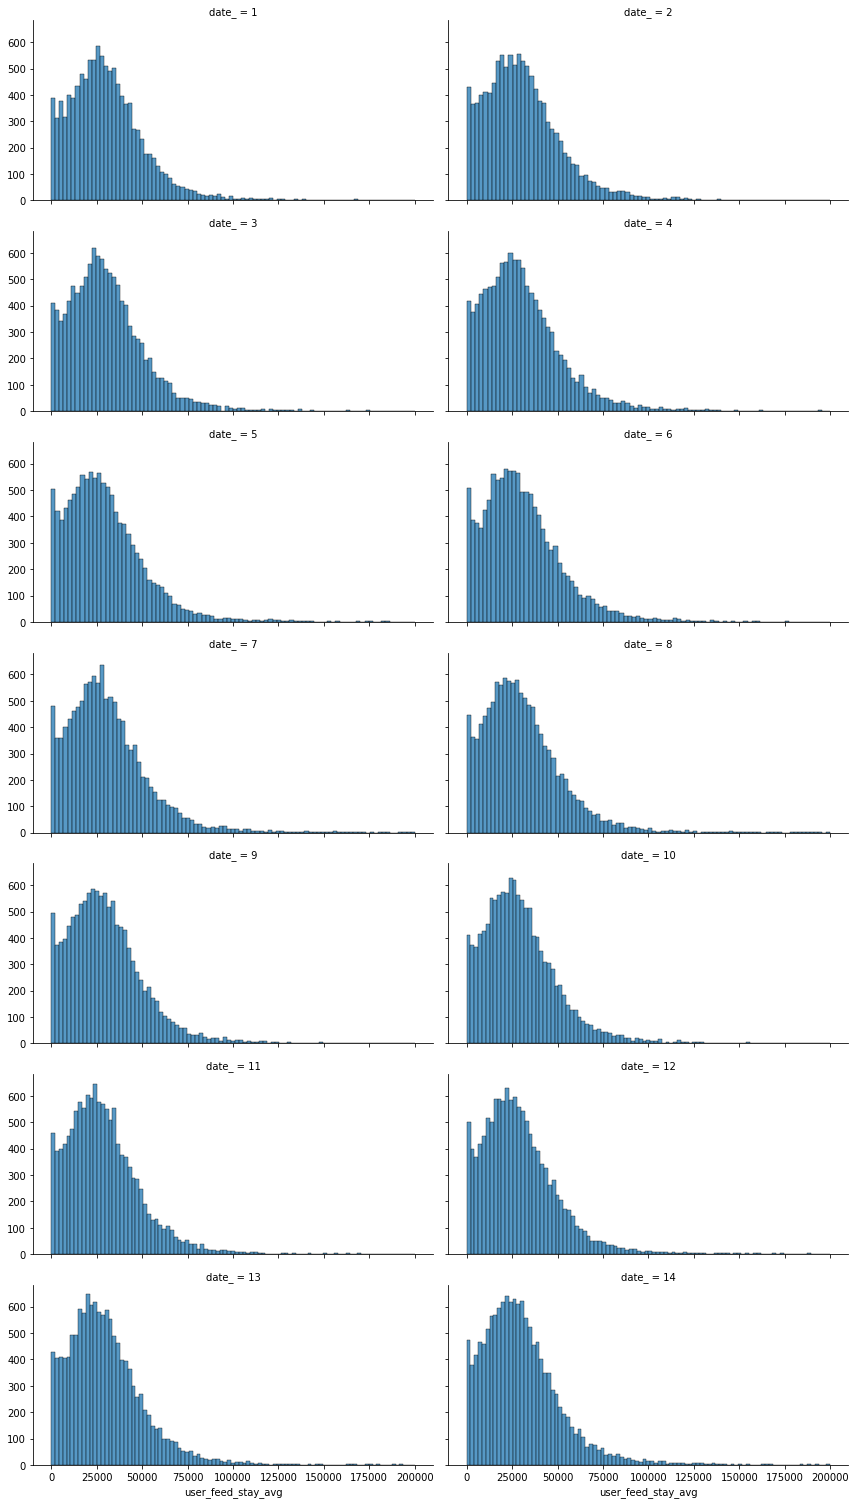

In [16]:
# 用户每天平均停留时长分布 直方图
g = sns.FacetGrid(user_action_base_stat2, col='date_', col_wrap=2, height=3, aspect=2)
g.map(sns.histplot, 'user_feed_stay_avg', binrange=[0,200000])

In [3]:
# 用户每天平均完播率分布 直方图
data = pd.merge(user_action, feed_info, how='left', on='feedid')
data['feed_finish_rate'] = data['play'] / data['videoplayseconds']

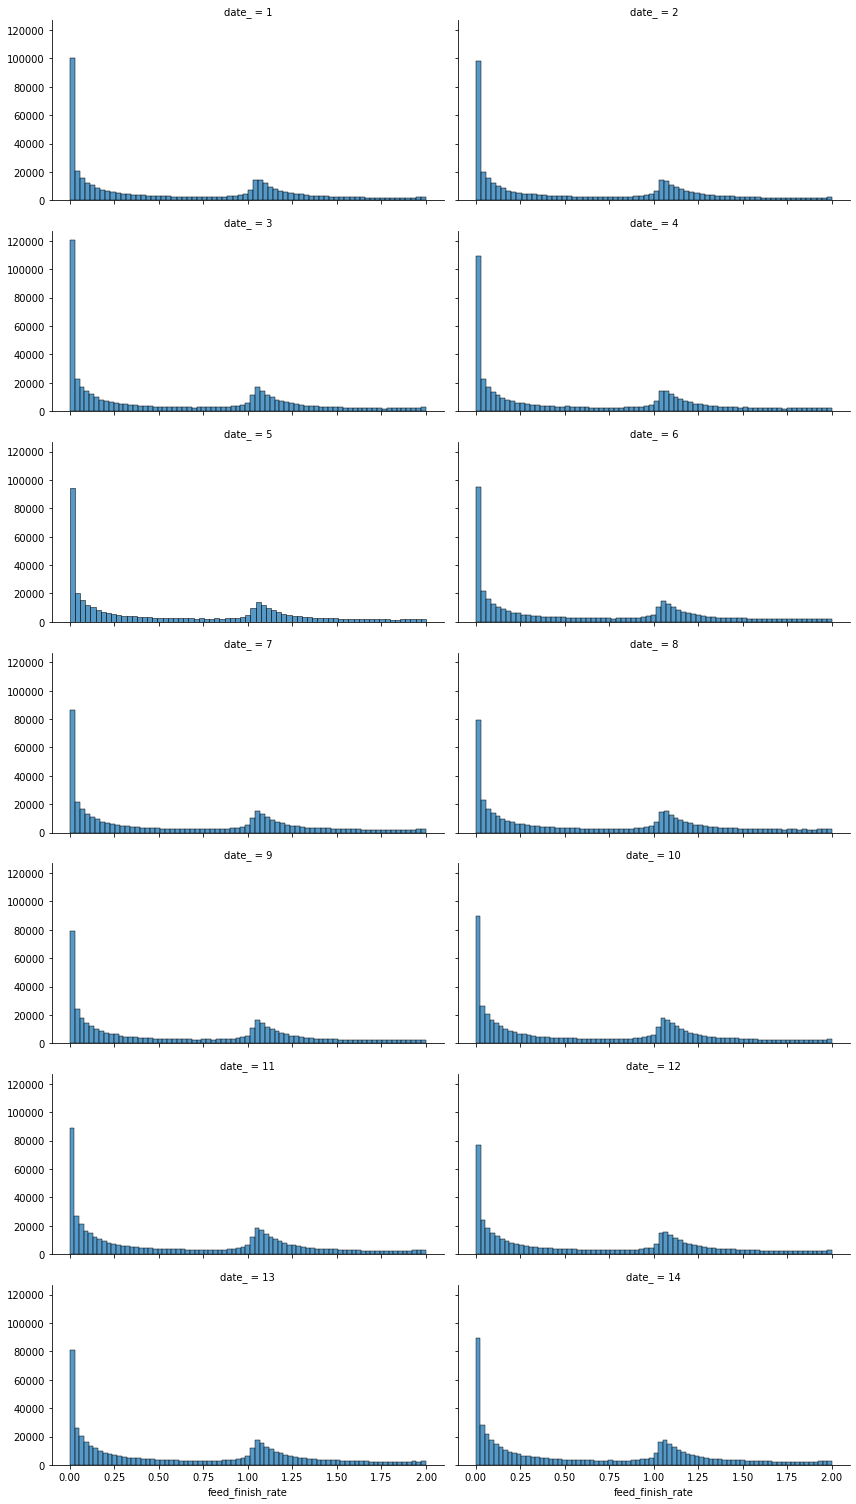

In [10]:
g = sns.FacetGrid(data, col='date_', col_wrap=2, height=3, aspect=2)
g.map(sns.histplot, 'feed_finish_rate', binrange=[0,2])

#### feed属性分布

<AxesSubplot:xlabel='videoplayseconds', ylabel='Count'>

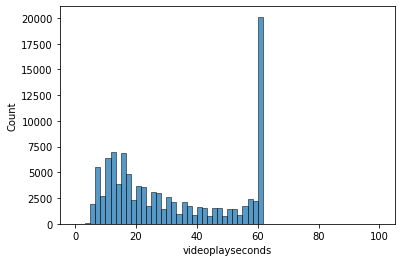

In [21]:
# feed时长分布
sns.histplot(feed_info['videoplayseconds'],  binrange=[0,100])

<AxesSubplot:ylabel='Count'>

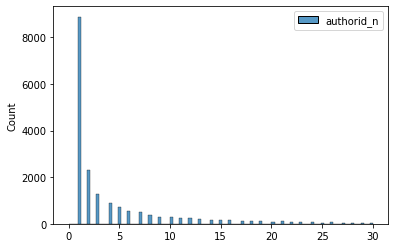

In [24]:
# feed作者作品数分布
feed_author_stat = feed_info.groupby('authorid').agg(
    authorid_n=pd.NamedAgg(column="feedid", aggfunc='nunique')
)
sns.histplot(feed_author_stat, binrange=[0,30])

只有1部feed的作者约占50%

### 样本定义

单任务，历史表现窗口为7天，测试集为1天，故训练集的`date_`，范围为8-14。    
以`read_commnet`为例，训练集label的分布为:

In [24]:
user_action[user_action['date_'].between(8,14)].groupby(['read_comment']).agg(
    label_n=pd.NamedAgg(column="userid", aggfunc='count'))

,label_n
read_comment,
0,3791486
1,139862


In [28]:
len(user_action['userid'].unique())

20000

In [29]:
pd.Series(user_action['userid'].unique())

0             8
1            12
2            13
3            25
4            37
          ...  
19995    250207
19996    250221
19997    250224
19998    250229
19999    250236
Length: 20000, dtype: int64